## Import required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from factor_analyzer import FactorAnalyzer

## Load Data

In [2]:
df = pd.read_csv('Data/8items.csv')
items = df.drop('student', axis=1)

## Correlations

In [3]:
# Item Correlation
items_corr = items.corr()

<AxesSubplot:>

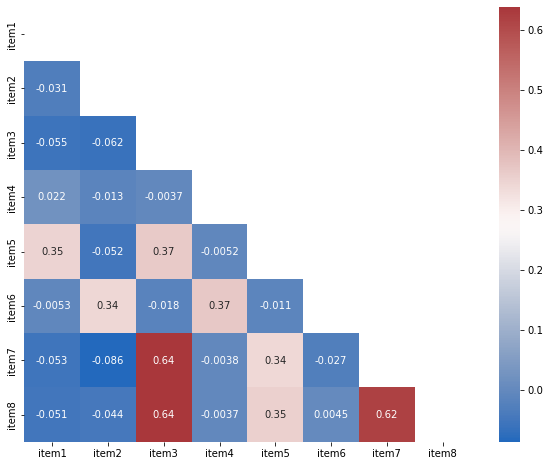

In [4]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(items_corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.color_palette("vlag", as_cmap=True)

plt.figure(figsize=(10, 8))
sns.heatmap(items_corr, mask=mask, cmap=cmap, annot=True)

* Items 1, 5 
* Items 2, 6 
* Items 3, 5, 7, 8 
* Items 4, 6 

In [5]:
corr_Qmatrix = np.array(items_corr>0.3,dtype=float)

corr_Qmatrix = pd.DataFrame(corr_Qmatrix, columns=items.columns ,index=items.columns)

In [6]:
corr_Qmatrix

,item1,item2,item3,item4,item5,item6,item7,item8
item1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
item2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
item3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
item4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
item5,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
item6,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
item7,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
item8,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0


## Factor Analysis

In [7]:
num_items = items.shape[1]

In [8]:
fa = FactorAnalyzer(n_factors=num_items, rotation='varimax')

In [9]:
fa.fit(items)

FactorAnalyzer(n_factors=8, rotation='varimax', rotation_kwargs={})

In [10]:
ev, v = fa.get_eigenvalues()

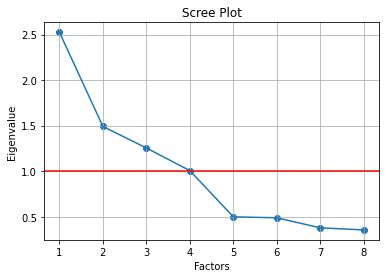

In [11]:
plt.scatter(range(1,num_items+1),ev)
plt.plot(range(1,num_items+1),ev)
plt.axhline(y = 1, color = 'r', linestyle = '-') 
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [12]:
num_factors = sum(ev>1)

fa = FactorAnalyzer(n_factors=num_factors, rotation='varimax')
fa.fit(items)

FactorAnalyzer(n_factors=4, rotation='varimax', rotation_kwargs={})

In [13]:
loadings = fa.loadings_

In [14]:
fa_Qmatrix = np.array(loadings>0.3,dtype=float)

fa_Qmatrix = pd.DataFrame(fa_Qmatrix,index=items.columns)
fa_Qmatrix

,0,1,2,3
item1,0.0,1.0,0.0,0.0
item2,0.0,0.0,0.0,1.0
item3,1.0,0.0,0.0,0.0
item4,0.0,0.0,1.0,0.0
item5,1.0,1.0,0.0,0.0
item6,0.0,0.0,1.0,1.0
item7,1.0,0.0,0.0,0.0
item8,1.0,0.0,0.0,0.0


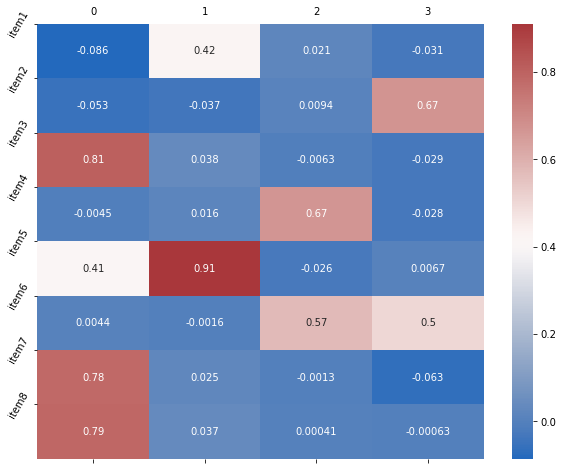

In [16]:
# Generate a custom diverging colormap
cmap = sns.color_palette("vlag", as_cmap=True)

plt.figure(figsize=(10, 8))
sns.heatmap(loadings, cmap=cmap, annot=True)
plt.yticks(range(len(items.columns)), items.columns, rotation=60)
plt.tick_params(labelbottom=False, labeltop=True)
plt.show()